In [245]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

In [2]:
# A selection of Software as a Service (SaaS) 2019 IPOs as recorded here: https://medium.com/@alexfclayton/2019-review-high-growth-saas-ipos-b393498463f7
# Accessed through the yfinance API
tickers = ["BILL", "CRWD", "DDOG", "FSLY", "NET", "ZM"]
historical_data = yf.download(tickers, period="5y")

YF.download() has changed argument auto_adjust default to True


[                       0%                       ]

[**********************50%                       ]  3 of 6 completed

[**********************67%*******                ]  4 of 6 completed

[**********************67%*******                ]  4 of 6 completed

[*********************100%***********************]  6 of 6 completed

In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-03-23 to 2025-03-21
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, BILL)   1257 non-null   float64
 1   (Close, CRWD)   1257 non-null   float64
 2   (Close, DDOG)   1257 non-null   float64
 3   (Close, FSLY)   1257 non-null   float64
 4   (Close, NET)    1257 non-null   float64
 5   (Close, ZM)     1257 non-null   float64
 6   (High, BILL)    1257 non-null   float64
 7   (High, CRWD)    1257 non-null   float64
 8   (High, DDOG)    1257 non-null   float64
 9   (High, FSLY)    1257 non-null   float64
 10  (High, NET)     1257 non-null   float64
 11  (High, ZM)      1257 non-null   float64
 12  (Low, BILL)     1257 non-null   float64
 13  (Low, CRWD)     1257 non-null   float64
 14  (Low, DDOG)     1257 non-null   float64
 15  (Low, FSLY)     1257 non-null   float64
 16  (Low, NET)      1257 non-null   float64
 17  (Low, ZM)      

In [4]:
historical_data.describe()

Price         Close                                                      \
Ticker         BILL         CRWD         DDOG         FSLY          NET   
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean     120.847629   209.316579   107.201384    31.054216    79.129984   
std       63.975438    84.245687    29.052655    28.386556    34.600307   
min       30.230000    51.450001    32.900002     5.630000    21.180000   
25%       74.709999   144.720001    87.750000    10.250000    56.400002   
50%      105.510002   194.559998   104.610001    17.209999    74.500000   
75%      148.910004   264.739990   125.440002    45.090000    95.660004   
max      342.260010   455.359985   196.559998   128.830002   217.250000   

Price                       High                                         ...  \
Ticker           ZM         BILL         CRWD         DDOG         FSLY  ...   
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000  ...   
mean     163.651631   124.255602   213.505803   109.626302    32.067578  ...   
std      127.656079    65.938889    85.394128    29.645493    29.399209  ...   
min       55.320000    31.690001    53.000000    34.099998     5.790000  ...   
25%       68.989998    76.589996   148.380005    89.519997    10.640000  ...   
50%       85.580002   109.070000   198.139999   107.250000    17.790001  ...   
75%      261.500000   152.330002   269.850006   127.570000    46.490002  ...   
max      568.340027   348.494995   455.589996   199.675003   136.500000  ...   

Price          Open                                               Volume  \
Ticker         DDOG         FSLY          NET           ZM          BILL   
count   1257.000000  1257.000000  1257.000000  1257.000000  1.257000e+03   
mean     107.205946    31.009757    79.046916   163.730697  1.955572e+06   
std       29.160777    28.334257    34.626986   127.961069  1.803748e+06   
min       34.049999     5.580000    20.930000    55.490002  3.626000e+05   
25%       87.650002    10.290000    56.419998    68.959999  1.164400e+06   
50%      104.620003    17.240000    74.500000    85.250000  1.559900e+06   
75%      125.339996    45.000000    95.150002   262.239990  2.165200e+06   
max      197.695999   131.449997   216.800003   572.500000  2.846310e+07   

Price                                                                         
Ticker          CRWD          DDOG          FSLY           NET            ZM  
count   1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  
mean    4.451538e+06  4.253399e+06  4.537940e+06  4.448224e+06  5.033211e+06  
std     3.784830e+06  2.680537e+06  4.456132e+06  2.882770e+06  4.596025e+06  
min     1.022500e+06  7.854000e+05  5.687000e+05  5.265000e+05  9.029000e+05  
25%     2.667000e+06  2.745800e+06  2.378500e+06  2.687300e+06  2.649200e+06  
50%     3.503800e+06  3.675300e+06  3.178800e+06  3.783700e+06  3.526400e+06  
75%     4.952100e+06  4.950400e+06  4.970400e+06  5.272500e+06  5.421000e+06  
max     5.407740e+07  2.913480e+07  5.771910e+07  3.319190e+07  5.322620e+07  

[8 rows x 30 columns]

In [5]:
historical_data.head()

Price           Close                                                          \
Ticker           BILL       CRWD       DDOG       FSLY        NET          ZM   
Date                                                                            
2020-03-23  37.290001  51.450001  32.900002  17.980000  21.410000  159.559998   
2020-03-24  41.360001  57.330002  34.490002  18.680000  22.410000  135.179993   
2020-03-25  41.110001  55.779999  33.689999  17.950001  21.660000  138.110001   
2020-03-26  41.230000  58.639999  34.299999  18.059999  21.600000  141.149994   
2020-03-27  38.799999  58.790001  34.549999  18.209999  21.959999  151.699997   

Price            High                                   ...       Open  \
Ticker           BILL       CRWD       DDOG       FSLY  ...       DDOG   
Date                                                    ...              
2020-03-23  38.438000  53.000000  34.099998  18.959999  ...  34.099998   
2020-03-24  41.740002  58.650002  35.389999  19.780001  ...  34.049999   
2020-03-25  42.980000  59.500000  36.889999  19.400000  ...  34.110001   
2020-03-26  45.959999  59.099998  35.930000  18.990000  ...  34.070000   
2020-03-27  40.200001  59.869999  35.240002  18.480000  ...  34.290001   

Price                                          Volume                     \
Ticker           FSLY        NET          ZM     BILL      CRWD     DDOG   
Date                                                                       
2020-03-23  18.000000  20.930000  141.996994  1307600  11127200  4407900   
2020-03-24  19.780001  22.040001  154.000000   520400   8088000  3495400   
2020-03-25  18.750000  22.059999  140.104996   786700   5517200  3049100   
2020-03-26  18.200001  21.700001  140.509995  1316600   5838700  4155000   
2020-03-27  17.580000  20.959999  145.699997  1724700   3826100  2892500   

Price                                   
Ticker         FSLY      NET        ZM  
Date                                    
2020-03-23  1912500  2276500  27681500  
2020-03-24  2383500  2577800  22401300  
2020-03-25  2103600  2660900  14743000  
2020-03-26  1095000  2290300   9252700  
2020-03-27  1180800  2787400  13271900  

[5 rows x 30 columns]

In [6]:
historical_data.tail()

Price           Close                                                       \
Ticker           BILL        CRWD        DDOG  FSLY         NET         ZM   
Date                                                                         
2025-03-17  46.580002  364.829987  103.970001  7.25  116.019997  75.160004   
2025-03-18  46.939999  363.149994  102.930000  7.08  115.120003  75.449997   
2025-03-19  48.040001  375.049988  104.430000  7.11  117.580002  76.260002   
2025-03-20  47.950001  369.029999  103.169998  7.00  117.940002  76.029999   
2025-03-21  47.919998  362.239990  105.029999  7.11  119.220001  75.970001   

Price            High                                 ...        Open         \
Ticker           BILL        CRWD        DDOG   FSLY  ...        DDOG   FSLY   
Date                                                  ...                      
2025-03-17  47.500000  370.859985  105.110001  7.410  ...  101.589996  6.890   
2025-03-18  47.250000  368.467010  103.400002  7.250  ...  103.239998  7.145   
2025-03-19  48.645000  381.260010  104.980003  7.350  ...  103.110001  7.120   
2025-03-20  48.470001  377.489990  105.000000  7.070  ...  103.980003  6.900   
2025-03-21  48.400002  372.190002  105.559998  7.195  ...  101.250000  6.850   

Price                               Volume                             \
Ticker             NET         ZM     BILL     CRWD     DDOG     FSLY   
Date                                                                    
2025-03-17  115.669998  74.504997  2078900  4255100  4033800  3546200   
2025-03-18  115.480003  74.080002  1672700  3185600  2995200  2685800   
2025-03-19  115.760002  75.980003  1744800  4056600  3147800  2484000   
2025-03-20  117.629997  75.610001  1514400  2883000  4912400  2772800   
2025-03-21  116.300003  75.550003  1871100  8116600  4943800  7628600   

Price                         
Ticker          NET       ZM  
Date                          
2025-03-17  2793500  1773800  
2025-03-18  2447200  1728700  
2025-03-19  2976700  1690000  
2025-03-20  2476700  1470900  
2025-03-21  4322500  6268800  

[5 rows x 30 columns]

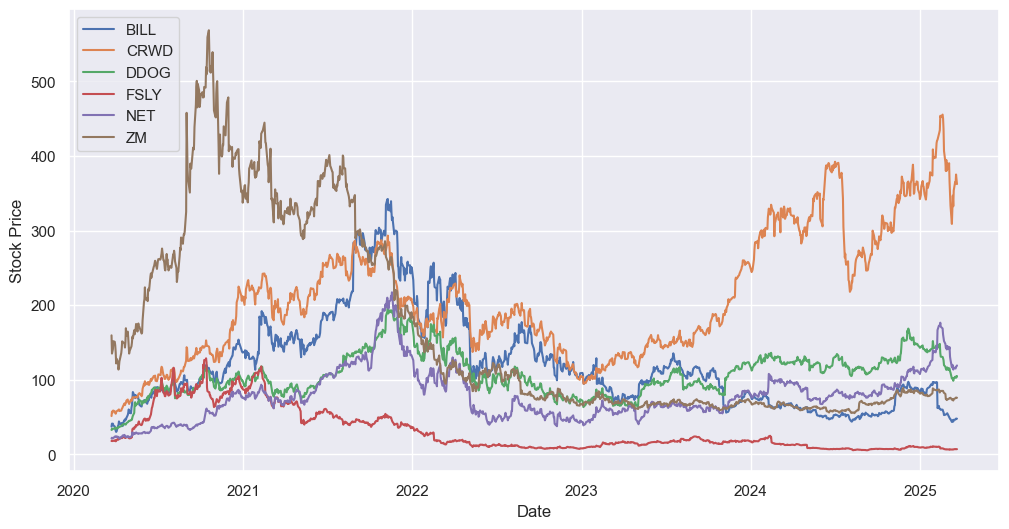

In [7]:
sns.set_theme()
plt.figure(figsize=(12, 6))
sns.lineplot(historical_data["Close"], dashes=False)
plt.legend(loc="upper left")
plt.ylabel("Stock Price");

Lots of interesting narrative here; Zoom's pandemic spike and subsequent crash; Crowdstrike's performance in spite of the huge 2024 outage; general underperformance of SaaS stocks since 2022 etc.

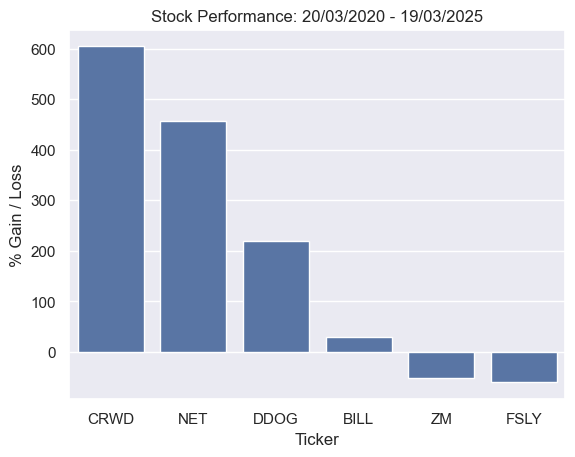

In [8]:
initial_close = historical_data.Close.iloc[0, :]
latest_close = historical_data.Close.iloc[-1, :]
gain_loss = (round(((latest_close - initial_close) / initial_close) * 100, 2))
gain_loss_df = pd.DataFrame({"Ticker": gain_loss.index, "Gain_Loss": gain_loss.values})
gain_loss_df.sort_values(by="Gain_Loss", ascending=False, inplace=True)

sns.barplot(data=gain_loss_df, x="Ticker", y="Gain_Loss").set_title("Stock Performance: 20/03/2020 - 19/03/2025")
plt.ylabel("% Gain / Loss");

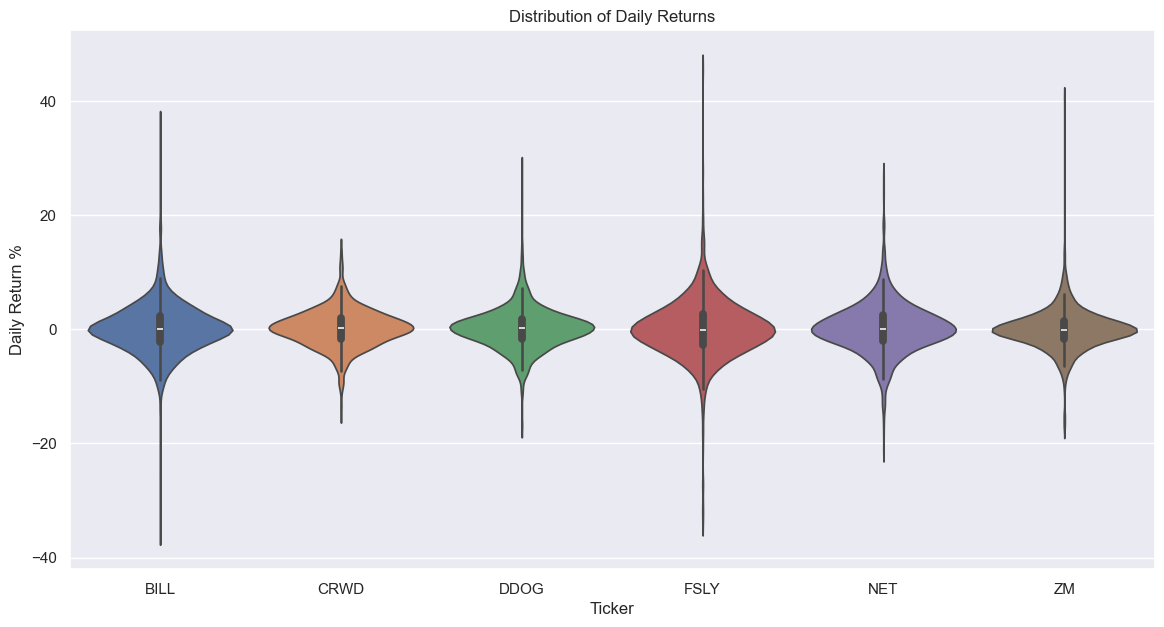

In [9]:
plt.figure(figsize=(14, 7))
sns.violinplot(historical_data["Close"].pct_change() * 100).set_title("Distribution of Daily Returns")
plt.ylabel("Daily Return %");

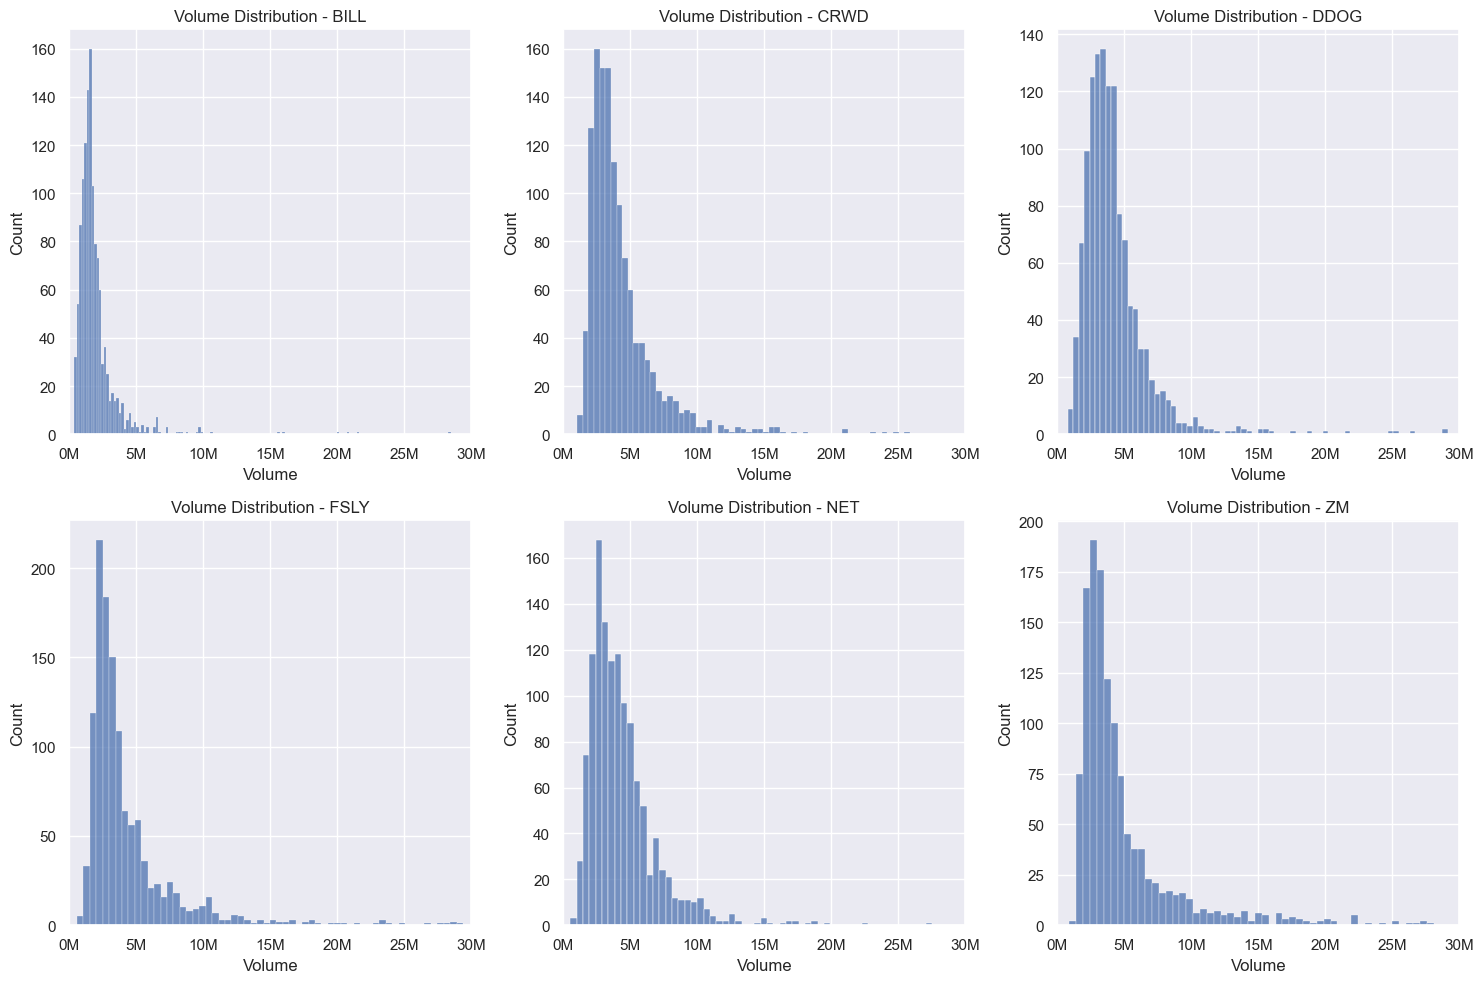

In [250]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

tickers = historical_data["Volume"].columns

axs = axs.flatten()
for i, ticker in enumerate(tickers):
    sns.histplot(historical_data["Volume"][ticker], ax=axs[i])
    axs[i].set_title(f"Volume Distribution - {ticker}")
    axs[i].set_xlabel("Volume")
    axs[i].set_xlim(0, 30000000)
    axs[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

plt.tight_layout()

In [47]:
vol_series = (round(historical_data['Volume'][-30:].mean()/1000000, 2)).sort_values(ascending=False)
vol_df = vol_series.to_frame(name="Average Daily Volume (Past 30 Days) (M)")
vol_df

,Average Daily Volume (Past 30 Days) (M)
Ticker,
DDOG,6.15
CRWD,4.86
NET,4.64
BILL,4.17
FSLY,4.01
ZM,3.08


Correlation between ticker closing prices

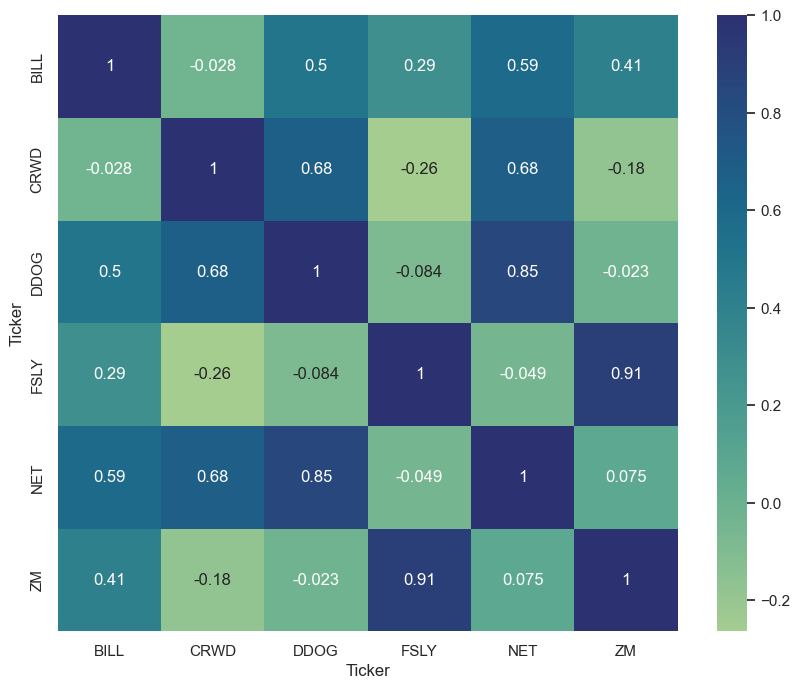

In [219]:
plt.figure(figsize=(10,8))
sns.heatmap(historical_data["Close"].corr(), cmap="crest", annot=True);

In [220]:
close_df = historical_data["Close"].reset_index()
close_df["month_year"] = close_df["Date"].dt.strftime("%B %Y")

In [221]:
first_dates_months = sorted(list(close_df.groupby(by=["month_year"])["Date"].idxmin()))
last_dates_months = sorted(list(close_df.groupby(by=["month_year"])["Date"].idxmax()))

first_td_df = close_df.iloc[first_dates_months, :].reset_index(drop=True)
last_td_df = close_df.iloc[last_dates_months, :].reset_index(drop=True)

In [274]:
perc_df = ((last_td_df[tickers] - first_td_df[tickers]) / first_td_df[tickers]) * 100
dates_df = close_df.loc[:, ["month_year"]].drop_duplicates().reset_index(drop=True)
month_perc_df = pd.concat([dates_df, perc_df], axis=1)

In [276]:
month_perc_df

Ticker,month_year,BILL,CRWD,DDOG,FSLY,NET,ZM
0,March 2020,-8.286404,8.221573,9.361696,5.561735,9.668378,-8.423165
1,April 2020,85.480313,23.964825,29.357791,22.941504,-2.321730,-1.335768
2,May 2020,24.959627,26.874727,58.448193,100.371565,27.276705,29.532332
3,June 2020,24.376121,5.746526,25.125917,80.131190,19.633949,24.192996
4,July 2020,3.559111,9.956290,5.012311,11.613651,12.699698,-2.014433
...,...,...,...,...,...,...,...
56,November 2024,54.857542,14.132549,23.925034,17.777775,14.026269,9.378312
57,December 2024,-5.373098,-1.337942,-6.534540,-4.356639,2.503567,-1.804837
58,January 2025,15.133841,14.605289,-0.640533,13.680784,22.978490,6.570238
59,February 2025,-42.385970,-1.989588,-18.584748,-33.169772,6.182408,-14.421743


In [277]:
month_perc_df["month_year"] = pd.to_datetime(month_perc_df["month_year"], format="%B %Y")
month_perc_df.set_index("month_year", inplace=True)

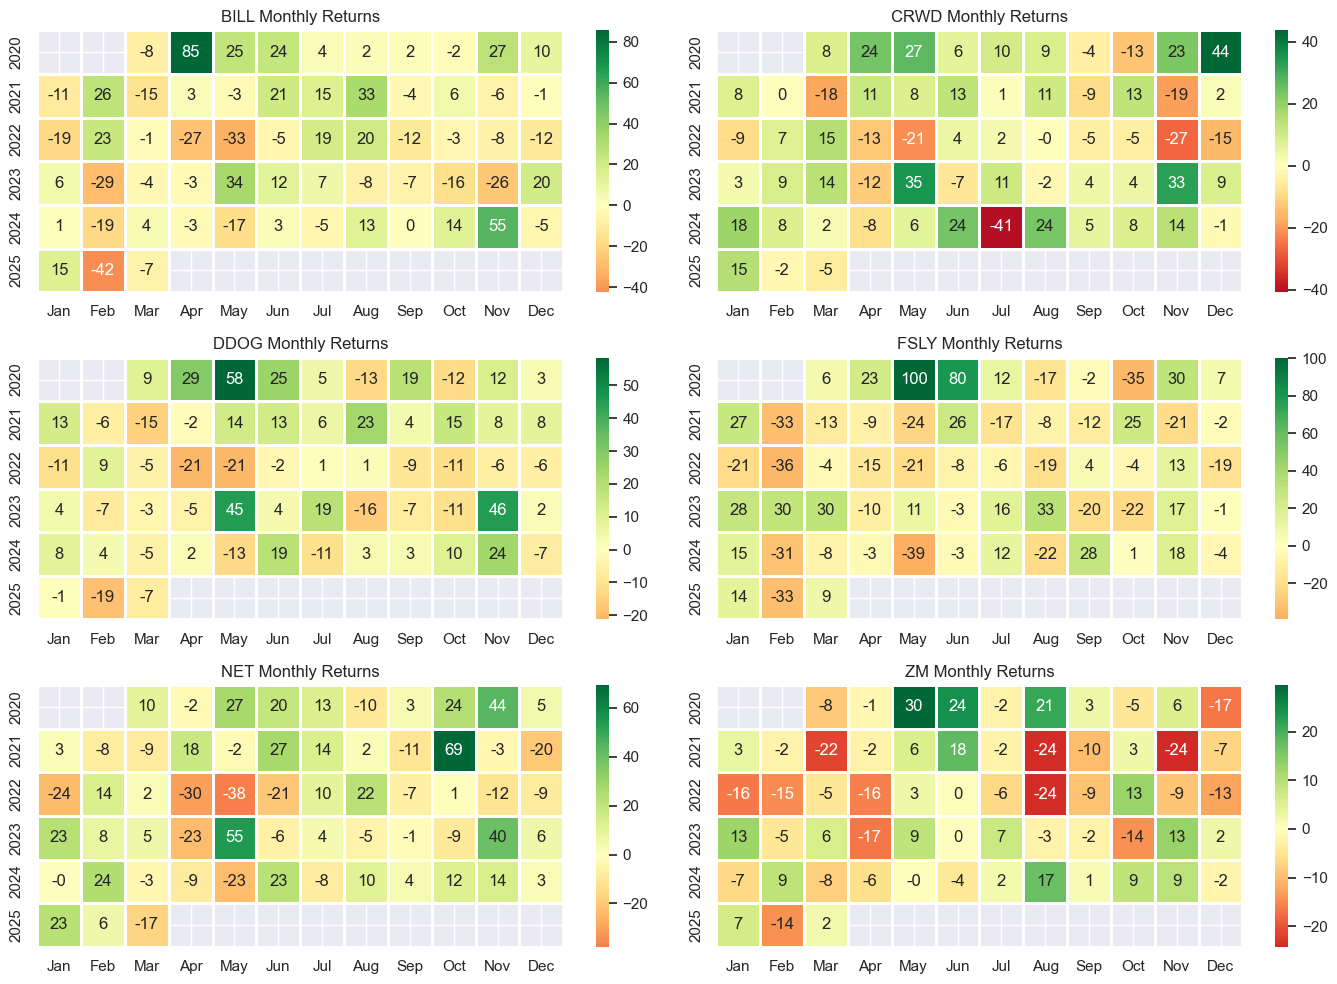

In [281]:
plt.figure(figsize=(14, 10))

for i, ticker in enumerate(tickers):
    plt.subplot(3, 2, i+1)
    pivot = pd.pivot_table(month_perc_df[ticker].reset_index(), values=ticker, index=month_perc_df.index.year, columns=month_perc_df.index.month)
    sns.heatmap(pivot, cmap="RdYlGn", center=0, linewidths=1, annot=True, fmt=".0f").set_title(f"{ticker} Monthly Returns")
    month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(np.arange(12) + 0.5, month_labels)

plt.tight_layout()